In [1]:
# Importing Libraries
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Following code Trains algorithm from Past Data and Also Tests it against a partition of Past Csv Data
#### 80% of the data was used to Train the algorithm while rest 20% was used to Test the efficiency 

In [2]:
df = pd.read_csv("past.csv")

In [3]:
df.describe()

,TimeStamp,Date,SQF,Temperature,Humidity,Clouds,Wind Speed
count,3.410000e+03,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,1.606015e+12,21.888856,159.511730,21.458067,38.068915,17.411437,2.935484
std,1.182069e+08,1.369842,3.888895,0.645560,2.921120,17.865569,1.199602
min,1.605810e+12,20.000000,142.000000,20.440000,33.000000,0.000000,1.500000
25%,1.605910e+12,21.000000,158.000000,21.060000,37.000000,0.000000,1.500000
50%,1.606020e+12,22.000000,160.000000,21.830000,37.000000,13.000000,3.100000
75%,1.606120e+12,23.000000,162.000000,21.980000,40.000000,40.000000,3.600000
max,1.606220e+12,24.000000,168.000000,22.120000,42.000000,40.000000,4.600000


In [5]:
TrainingData,TestingData = train_test_split(df,test_size=0.20)

In [6]:
TrainingInput = TrainingData[['Clouds']]

In [7]:
TrainingOutput = TrainingData[['SQF']]

In [8]:
TestingInput = TestingData[['Clouds']]
TestingOutput = TestingData[['SQF']]

In [9]:
TrainingInput.describe()

,Clouds
count,2728.00000
mean,17.48607
std,17.88696
min,0.00000
25%,0.00000
50%,13.00000
75%,40.00000
max,40.00000


In [132]:
TrainingOutput.describe()

,SQF
count,2728.000000
mean,159.504399
std,3.882201
min,142.000000
25%,158.000000
50%,160.000000
75%,162.000000
max,168.000000


In [10]:
TestingInput.describe()

,Clouds
count,682.000000
mean,17.112903
std,17.789696
min,0.000000
25%,0.000000
50%,13.000000
75%,40.000000
max,40.000000


In [134]:
TestingOutput.describe()

,SQF
count,682.000000
mean,159.541056
std,3.918282
min,145.000000
25%,158.000000
50%,160.000000
75%,162.000000
max,167.000000


In [11]:
RegressionAlgorithm = linear_model.LinearRegression()
RegressionAlgorithm.fit(TrainingInput,TrainingOutput)

LinearRegression()

In [12]:
PredictedOutput = RegressionAlgorithm.predict(TestingInput)

In [13]:
display(PredictedOutput)

array([[158.97363132],
       [159.60400371],
       [159.60400371],
       [159.60400371],
       [158.97363132],
       [159.60400371],
       [159.90751634],
       [158.97363132],
       [159.90751634],
       [159.60400371],
       [159.60400371],
       [158.97363132],
       [159.90751634],
       [159.90751634],
       [159.90751634],
       [158.97363132],
       [159.60400371],
       [158.97363132],
       [159.90751634],
       [159.90751634],
       [158.97363132],
       [158.97363132],
       [158.97363132],
       [158.97363132],
       [158.97363132],
       [159.60400371],
       [158.97363132],
       [159.90751634],
       [159.90751634],
       [159.90751634],
       [159.60400371],
       [158.97363132],
       [158.97363132],
       [159.90751634],
       [158.97363132],
       [158.97363132],
       [159.90751634],
       [159.60400371],
       [158.97363132],
       [158.97363132],
       [158.97363132],
       [159.60400371],
       [159.90751634],
       [158

In [14]:
print("Average Error : ")
print(abs(TestingOutput-PredictedOutput)/TestingOutput)

Average Error : 
           SQF
2844  0.006162
1508  0.003799
1734  0.026805
1941  0.002475
2792  0.006162
...        ...
1248  0.025048
1849  0.010152
1097  0.000578
3409  0.000166
1672  0.020834

[682 rows x 1 columns]


In [15]:
print("Average Error %")
X = abs(TestingOutput-PredictedOutput)/TestingOutput
print(X['SQF'].mean())

Average Error %
0.017515410343803956


# Trying to Visually assess the data

### This graph shows the difference between Actual and Predicted Values from Past Dataset

In [16]:
x=np.array(PredictedOutput)
y=np.array(TestingOutput)


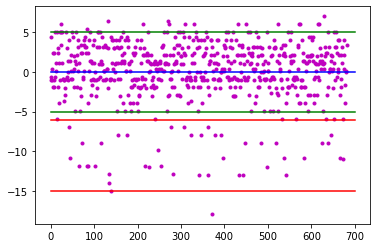

In [17]:
plt.plot((y-x),marker='.',linestyle='',color="m")
controlx=np.array([0,700])
controly=np.array([0,0])
plt.plot(controlx,controly,color="b")
controlx=np.array([0,700])
controly=np.array([-5,-5])
plt.plot(controlx,controly,color="g")
controlx=np.array([0,700])
controly=np.array([5,5])
plt.plot(controlx,controly,color="g")
controlx=np.array([0,700])
controly=np.array([-6,-6])
plt.plot(controlx,controly,color="r")
controlx=np.array([0,700])
controly=np.array([-15,-15])
plt.plot(controlx,controly,color="r")

### This graph shows the percentage Error 

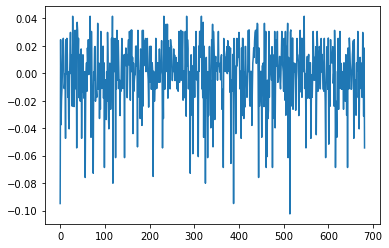

In [142]:
plt.plot((y-x)/y)

# Here the Future CSV was imported and tested against Algorithm

In [18]:
FutureFile = pd.read_csv("Future.csv")

In [19]:
FutureFile.describe()

,Temperature,Humidity,Clouds,Wind Speed
count,8.000000,8.00000,8.000000,8.000000
mean,25.951250,23.25000,16.875000,2.415000
std,0.965645,6.18177,30.469833,1.473994
min,24.290000,17.00000,0.000000,0.450000
25%,25.527500,18.50000,0.000000,1.470000
50%,26.160000,21.00000,0.000000,2.130000
75%,26.750000,29.50000,18.250000,3.540000
max,26.930000,31.00000,84.000000,4.770000


In [20]:
df[['Clouds']].describe()

,Clouds
count,3410.000000
mean,17.411437
std,17.865569
min,0.000000
25%,0.000000
50%,13.000000
75%,40.000000
max,40.000000


In [21]:
FutureFile = FutureFile[['Clouds']]
print(FutureFile)

   Clouds
0      84
1      40
2       0
3       0
4      11
5       0
6       0
7       0


In [23]:
FuturePredictions = RegressionAlgorithm.predict(FutureFile)

In [24]:
print(FuturePredictions)

[[157.94635779]
 [158.97363132]
 [159.90751634]
 [159.90751634]
 [159.65069796]
 [159.90751634]
 [159.90751634]
 [159.90751634]]


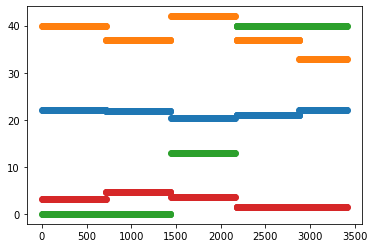

In [164]:
plt.plot(TestingData['Temperature'],marker="o",linestyle="")
plt.plot(TestingData['Humidity'],marker="o",linestyle="")
plt.plot(TestingData['Clouds'],marker="o",linestyle="")
plt.plot(TestingData['Wind Speed'],marker="o",linestyle="")


# Green Colored values are from the Data Fed into the algorithm and Red are the values from Future.csv

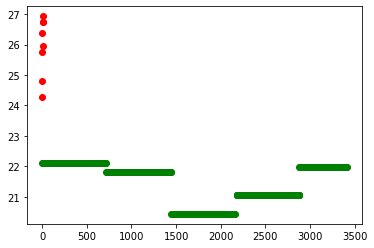

In [170]:
plt.plot(FutureFile['Temperature'],marker="o",linestyle="",color='r')
plt.plot(TestingData['Temperature'],marker="o",linestyle="",color='g')


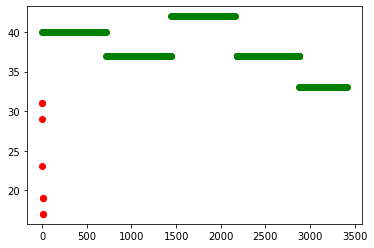

In [172]:
plt.plot(FutureFile['Humidity'],marker="o",linestyle="",color='r')
plt.plot(TestingData['Humidity'],marker="o",linestyle="",color='g')


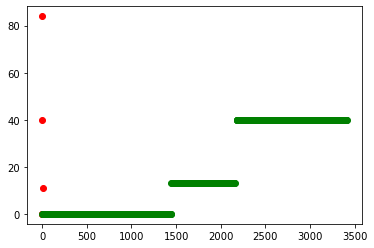

In [173]:
plt.plot(FutureFile['Clouds'],marker="o",linestyle="",color='r')
plt.plot(TestingData['Clouds'],marker="o",linestyle="",color='g')

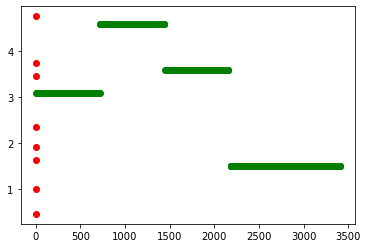

In [174]:
plt.plot(FutureFile['Wind Speed'],marker="o",linestyle="",color='r')
plt.plot(TestingData['Wind Speed'],marker="o",linestyle="",color='g')

## The rest of the code is under production...